<a href="https://colab.research.google.com/github/MiriamSanta/MiriamSanta/blob/main/tema_Seminar9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
marathon = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
"teaching-data/master/marek/37_pzu_warsaw_marathon_simplified.csv",
comment="#")

In [4]:
sex_array = marathon["sex"].values
print("Array NumPy:", sex_array[:10])

codes, uniques = pd.factorize(sex_array)
print("Primele 20 coduri:", codes[:20])
print("Categorii unice:", list(uniques))

Array NumPy: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
Primele 20 coduri: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1]
Categorii unice: ['M', 'F']


In [5]:
sex_cat = marathon["sex"].astype("category")

sex_cat = sex_cat.cat.reorder_categories(["F", "M"], ordered=True)

sex_cat = sex_cat.cat.rename_categories({"M": "Male", "F": "Female"})

print(sex_cat.head())

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: category
Categories (2, object): ['Female' < 'Male']


In [6]:
freq_abs = marathon["category"].value_counts()
print("Frecvențe absolute:\n", freq_abs)

prop_pct = (marathon["category"].value_counts(normalize=True) * 100).round(2)
prop_pct = prop_pct.sort_index()
print("\nProporții (%), sortate alfabetic:\n", prop_pct)


Frecvențe absolute:
 category
M30    2200
M40    1708
M20     879
M50     541
F30     449
F40     262
F20     240
M60     151
F50      43
M70      19
F60      18
F70       1
Name: count, dtype: int64

Proporții (%), sortate alfabetic:
 category
F20     3.69
F30     6.90
F40     4.02
F50     0.66
F60     0.28
F70     0.02
M20    13.50
M30    33.79
M40    26.23
M50     8.31
M60     2.32
M70     0.29
Name: proportion, dtype: float64


In [7]:
marathon["sex_from_category"] = marathon["category"].str[0]

print((marathon["sex_from_category"] == marathon["sex"]).all())


True


In [14]:
tab_cs = marathon.groupby("country")["sex"].value_counts().unstack(fill_value=0)

print(tab_cs.head())

sex      F  M
country      
AE       0  1
AT       0  8
AU       0  1
BE       2  3
BG       0  1


In [15]:
sub = tab_cs.loc[["PL", "IL", "MA"], :]
print("Număr participanți pe sex pentru PL, IL, MA:\n", sub)


Număr participanți pe sex pentru PL, IL, MA:
 sex        F     M
country           
PL       926  5107
IL         4    17
MA         0     1


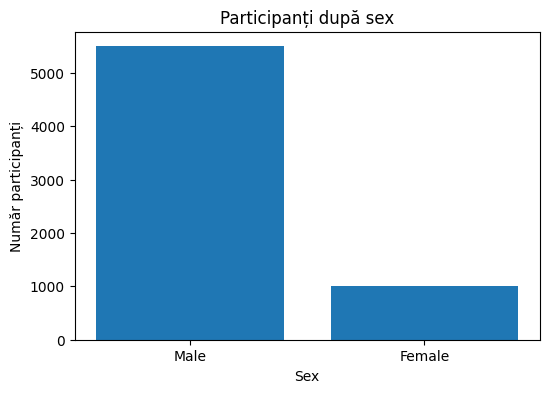

In [16]:
counts = sex_cat.value_counts().reindex(["Male", "Female"])
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Sex")
plt.ylabel("Număr participanți")
plt.title("Participanți după sex")
plt.show()


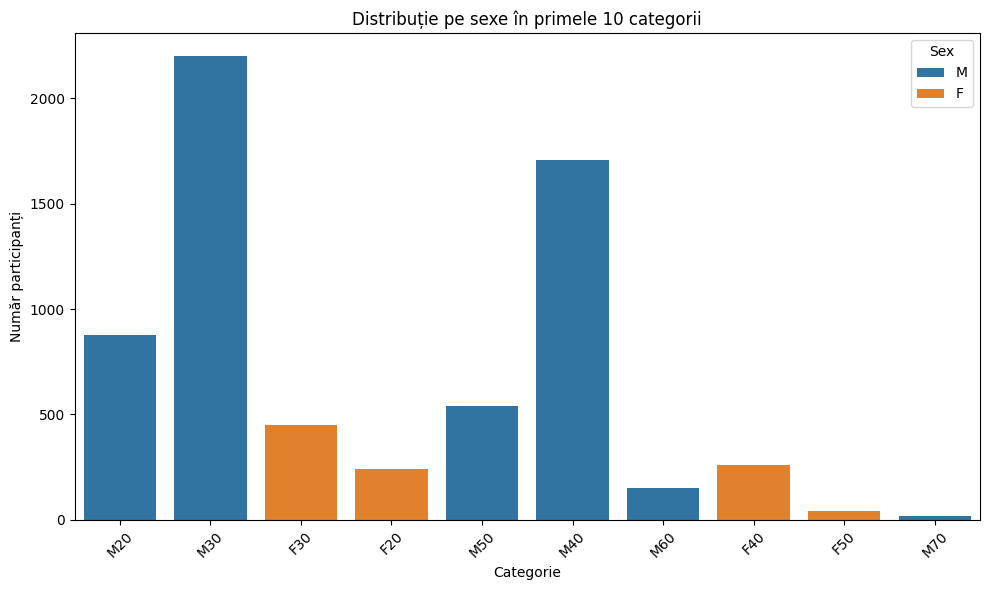

In [17]:
plt.figure(figsize=(10,6))
top10 = marathon["category"].value_counts().index[:10]
sns.countplot(
    data=marathon[marathon["category"].isin(top10)],
    x="category",
    hue="sex"
)
plt.xticks(rotation=45)
plt.xlabel("Categorie")
plt.ylabel("Număr participanți")
plt.title("Distribuție pe sexe în primele 10 categorii")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


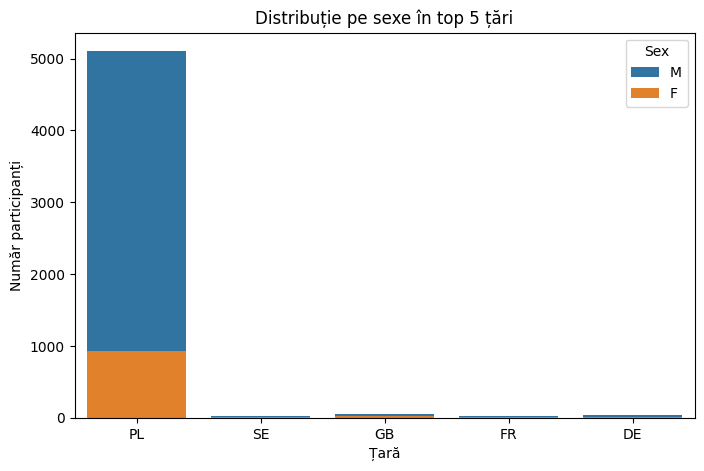

In [18]:
plt.figure(figsize=(8,5))
top5_countries = marathon["country"].value_counts().index[:5]
sns.countplot(
    data=marathon[marathon["country"].isin(top5_countries)],
    x="country",
    hue="sex",
    dodge=False  # suprapunere în loc de aliniere laterală
)
plt.xlabel("Țară")
plt.ylabel("Număr participanți")
plt.title("Distribuție pe sexe în top 5 țări")
plt.legend(title="Sex")
plt.show()


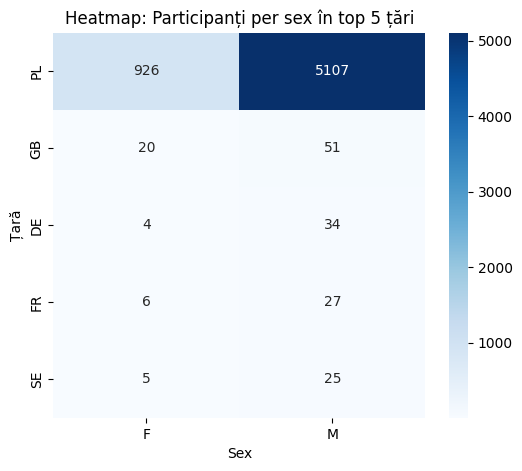

In [19]:
heat_tab = marathon.groupby("country")["sex"].value_counts().unstack(fill_value=0)
heat_tab = heat_tab.loc[top5_countries]  # selectăm doar top5

plt.figure(figsize=(6,5))
sns.heatmap(heat_tab, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Sex")
plt.ylabel("Țară")
plt.title("Heatmap: Participanți per sex în top 5 țări")
plt.show()
